## 逻辑回归-Titanic

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
#查看数据集目录结构
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/gender_submission.csv
./data/test.csv
./data/train.csv


In [16]:
data = pd.read_csv('./data/train.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 数据集介绍

Titanic - Machine Learning from Disaster竞赛的训练集由891条数据组成，每条数据包含以下12个特征：

PassengerId：乘客ID

Survived：是否生还（0：遇难，1：生还）

Pclass：船票等级（1：一等舱，2：二等舱，3：三等舱）

Name：乘客姓名

Sex：乘客性别

Age：乘客年龄

SibSp：配偶或兄弟姐妹的数量

Parch：父母或子女的数量

Ticket：船票号码

Fare：票价

Cabin：船舱号码

Embarked：登船港口（C：Cherbourg，Q：Queenstown，S：Southampton）

其中，Survived是要被预测的目标变量，其余11个特征均为作为模型训练的输入变量。

In [19]:
data.sample(3)  #随机抽取3条数据查看

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [20]:
#拆分训练数据和目标
X, y = data.drop(['Survived'], axis = 1),data['Survived']

In [22]:
#特征拆分，拆分为数值型特征和分类特征
num_cols = [x for x in X.columns if data[x].dtype in ['int64', 'float64']]
cat_cols = [x for x in X.columns if data[x].dtype == 'object']

In [23]:
#机器学习问题，使用sklearn作数据预处理
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 数据预处理

对于数值型特征，在num_transform中，Pipeline中的每个步骤都是一个特征预处理方法，按照顺序依次执行。具体来说，第一个步骤使用SimpleImputer方法，将缺失值填充为常数值。这里指定的是strategy='constant'，表示填充一个常量值（默认为0）。第二个步骤使用MaxAbsScaler方法，对所有特征进行最大值绝对值缩放，将特征值统一缩放到[-1,1]的区间内。

对于分类特征，在cat_transform中，也是依次执行一系列预处理步骤。第一个步骤同样使用SimpleImputer方法，但这里的strategy='most_frequent'，表示填充出现频率最高的值。第二个步骤使用OneHotEncoder方法，将分类变量进行独热编码，使其可以被机器学习模型所接受。最后，同样使用MaxAbsScaler方法进行最大值绝对值缩放。

这样，对于每个数据样本，数值型特征和分类特征就可以分别经过num_transform和cat_transform进行预处理，最后合并起来作为特征矩阵的一部分，供后续的机器学习模型使用。

In [24]:
#定义两个Pipeline对象，分别用于对数值型特征和分类特征进行预处理
num_transform = Pipeline(steps=[
                ('impute', SimpleImputer(strategy='constant')),
                ('scale', MaxAbsScaler())
])

cat_transform = Pipeline(steps=[
                ('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('scale', MaxAbsScaler())
])

In [25]:
preprocess = ColumnTransformer(transformers=[
                               ('cat', cat_transform, cat_cols),
                               ('num', num_transform, num_cols)
])  # 用于对整个数据进行列变换，即将不同类型的特征按照预定义的转换方式进行变换

In [26]:
X = preprocess.fit_transform(X)  #获得特征矩阵

In [27]:
#使用了train_test_split函数将处理后的特征矩阵X和标签向量y划分为训练集和测试集。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [28]:
X_train.shape

(801, 1730)

In [29]:
y_train.shape

(801,)

In [30]:
X_train = X_train.toarray()
X_test = X_test.toarray()
y_train = y_train.values
y_test = y_test.values

## 构建线性回归模型

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils import shuffle
from torch.autograd import Variable

In [32]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.f1 = nn.Linear(input_dim, 2000)
        self.f2 = nn.Linear(2000, output_dim)


    def forward(self,x):
        x = self.f1(x)
        x = F.leaky_relu(x)
        x = F.dropout(x, p = 0.3)
        x = self.f2(x)
        return  F.sigmoid(x)

In [33]:
batch_size = 100
batch_no = len(X_train) // batch_size

In [34]:
#定义生成器函数generate_batches()，用于在训练模型时按批次生成数据。
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for i in range(len(X)//batch_size):
        if i + batch_size >= len(X):
            continue
        ind = perm[i*batch_size : (i+1)*batch_size]
        yield (X[ind], y[ind])

In [35]:
input_dim = 1730
output_dim = 2
learning_rate = 1
model = LinearRegression(input_dim,output_dim)
error = nn.CrossEntropyLoss()  #交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.5)

In [36]:
model

LinearRegression(
  (f1): Linear(in_features=1730, out_features=2000, bias=True)
  (f2): Linear(in_features=2000, out_features=2, bias=True)
)

In [37]:
loss_list = []
acc_list = []
iteration_number = 300

## 训练

In [38]:
for iteration in range(iteration_number):
    batch_loss = 0
    batch_accur = 0
    temp = 0

    for (x, y) in generate_batches(X_train, y_train, batch_size):
        inputs = Variable(torch.from_numpy(x)).float()
        labels = Variable(torch.from_numpy(y))
            
        optimizer.zero_grad() 

        results = model(inputs)
        
        loss = error(results, labels)

        batch_loss += loss.data
        
        loss.backward()
        
        optimizer.step()

        with torch.no_grad():
            _, pred = torch.max(results, 1)
            batch_accur += torch.sum(pred == labels)
            temp += len(pred)
    
    loss_list.append(batch_loss/batch_no)
    acc_list.append(batch_accur/temp)
    
    if(iteration % 50 == 0):
        print('epoch {}: loss {}, accuracy {}'.format(iteration, batch_loss/batch_no, batch_accur/temp))

epoch 0: loss 0.6666297316551208, accuracy 0.6087499856948853
epoch 50: loss 0.3973204791545868, accuracy 0.9212499856948853
epoch 100: loss 0.375295490026474, accuracy 0.9424999952316284
epoch 150: loss 0.3446394205093384, accuracy 0.9712499976158142
epoch 200: loss 0.3179880976676941, accuracy 0.9975000023841858
epoch 250: loss 0.31551629304885864, accuracy 0.9987499713897705


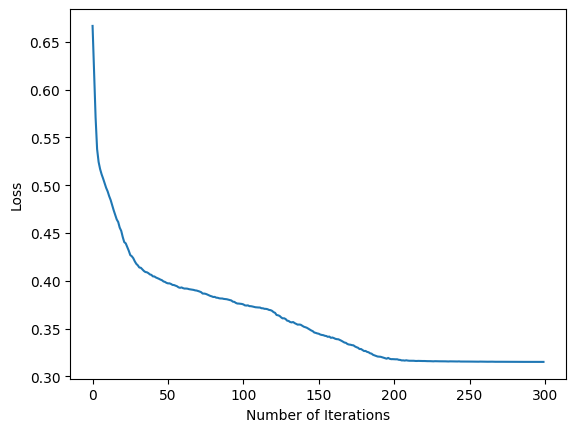

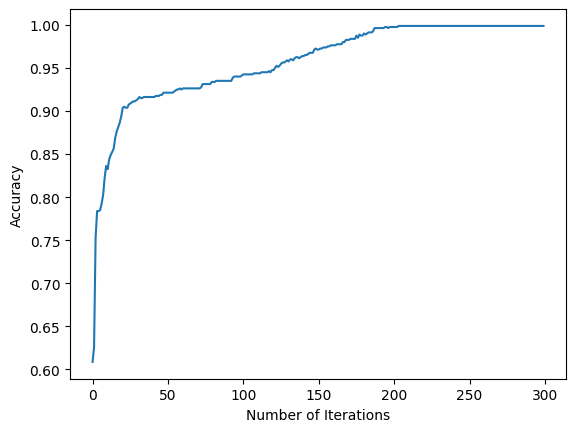

In [39]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()
plt.plot(range(iteration_number),acc_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.show()

In [40]:
#测试测试集的准确率精度
X_test_var = Variable(torch.FloatTensor(X_test), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()
print((survived == y_test).sum()/len(survived))

0.8777777777777778


## 预测

In [41]:
X_test_origin = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [42]:
X_test_origin = preprocess.transform(X_test_origin)
X_test_origin = X_test_origin.toarray()
X_test_var = Variable(torch.FloatTensor(X_test_origin), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()

In [43]:
X_test_1 = pd.read_csv("./data/test.csv")

In [44]:
import csv

submission = [['PassengerId', 'Survived']]
for i in range(len(survived)):
    submission.append([X_test_1.PassengerId.loc[i], survived[i]])

In [45]:
with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission)
    
print('Writing Complete!')

Writing Complete!
